In [45]:
# Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
# Data loading

df1 = pd.read_csv("C:/Users/chole/Desktop/UCI_Heart_Disease/df_1.csv")
df2 = pd.read_csv("C:/Users/chole/Desktop/UCI_Heart_Disease/df_2.csv")

# Data split

X1 = df1.drop(columns="num")
y1 = df1.num

X2 = df2.drop(columns="num")
y2 = df2.num

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1,
                                                        test_size=0.2,
                                                        random_state=42)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2,
                                                        test_size=0.2,
                                                        random_state=42)

In [5]:
# Column transformer for df1 and df2

column_t_1 = make_column_transformer(
    (OneHotEncoder(drop="if_binary"), ["sex", "cp", "dataset", "fbs", "restecg", "exang", "slope"]),
    (StandardScaler(), ["age", "trestbps", "chol", "thalch", "oldpeak"]),
    remainder="passthrough"
)

column_t_2 = make_column_transformer(
    (OneHotEncoder(drop="if_binary"), ["sex", "cp", "dataset", "fbs", "restecg", "exang"]),
    (StandardScaler(), ["age", "trestbps", "chol", "thalch", "oldpeak"]),
    remainder="passthrough"
)


kNN: 0.620095 (0.038526)
Tree: 0.628186 (0.038516)


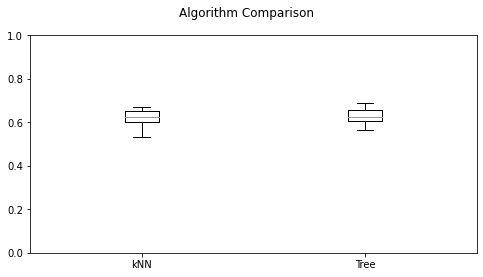

In [23]:
# Models Dict

models = {"kNN": KNeighborsClassifier(n_neighbors=5),
          "Tree": DecisionTreeClassifier()}

# Lists for results stores

names = []
results = []

# Loop through models

for name, model in models.items():
    pipe = Pipeline([
        ("preProc", column_t_2),
        ("model", model)
    ])

    cv_res = cross_val_score(pipe, X2_train, y2_train, cv=10, scoring="accuracy")

    results.append(cv_res)
    names.append(name)
    print("%s: %f (%f)" % (name, cv_res.mean(), cv_res.std()))

# boxplot algorithm comparison
plt.rcParams['figure.figsize'] = [8, 4]
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)  # all on the same box
plt.boxplot(results)
ax.set_xticklabels(names)
plt.ylim(0, 1)
plt.show()

In [33]:
knn = KNeighborsClassifier(n_neighbors=5)

pipe = Pipeline([
    ("preProc", column_t_1),
    ("model", knn)
]).fit(X1_train,y1_train)

In [34]:
pred = pipe.predict(X1_test)
precision_score(y1_test,pred, average=None)

array([0.6779661 , 0.58064516, 0.3       , 0.42857143, 0.        ])

In [47]:
recall_score(y1_test, pred, average=None)

array([0.86956522, 0.58064516, 0.25      , 0.1875    , 0.        ])